In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find db structure - Measurement
first_measurement = session.query(Measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bea17ff5c0>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0}

In [10]:
# Find db structure - Station
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bea17ffda0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [21]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [31]:
# Save the query results as a Pandas DataFrame and sort by date
precip_df = pd.DataFrame(results)
precip_df.sort_values("date", inplace=True)
precip_df.head(20)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
1192,2016-08-23,0.02
1,2016-08-24,0.08
1530,2016-08-24,2.15
705,2016-08-24,2.28


In [32]:
# Set the df index to the date
precip_df.set_index("date", inplace=True)
precip_df.head(20)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


In [33]:
# Replace NaNs with 0s
precip_df.fillna(0, inplace=True)
precip_df.head(20)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


<Figure size 432x288 with 0 Axes>

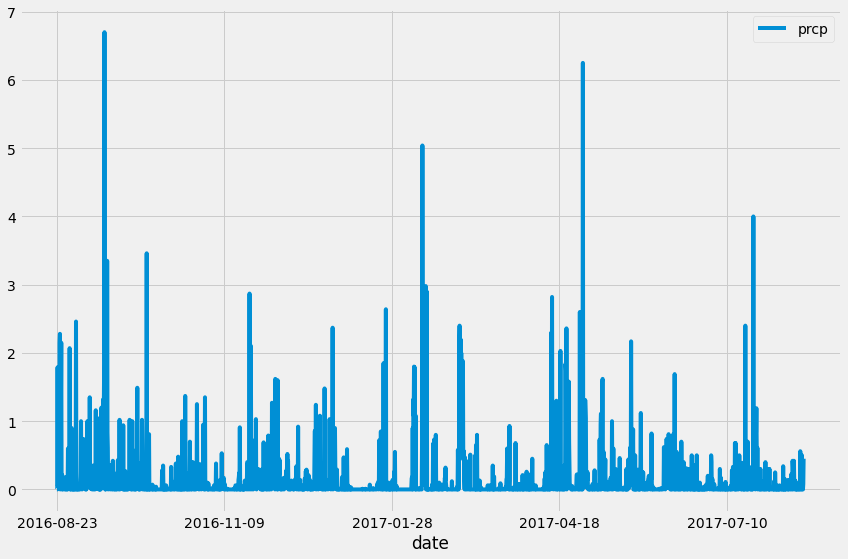

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
precip_df.plot(figsize=(12,8))
plt.y_label = "Precipitation in Inches"
plt.tight_layout()
plt.show()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
station_count

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
selection = [Station.id, Station.name, Station.station, Measurement.station, Measurement.date]

same_station = session.query(*selection).filter(Station.station == Measurement.station).all()
same_station

In [ ]:
# Unpack results and assign to dataframe
sta_obs = list(zip(*same_station))
sta_obs_df = pd.DataFrame({"station_id" : sta_obs[0],
                           "station_name" : sta_obs[1],
                           "station_number" : sta_obs[2],
                           "observation_date" : sta_obs[4]})
sta_obs_df

In [ ]:
# Group by station id and count
sta_obs_grouped = sta_obs_df.groupby("station_id").count()
sta_obs_grouped.sort_values(by="observation_date", axis=0, inplace=True, ascending=False)
sta_obs_grouped

In [ ]:
# Get station identifier for station 7
station_id_7 = session.query(Station.station, Station.name).filter(Station.id == 7).first()
print(station_id_7)
station_id_7 = station_id_7[0]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_seven = session.query(Measurement.tobs).filter(Measurement.station == station_id_7).all()
station_seven = list(np.ravel(station_seven))
station_seven

In [ ]:
# Calculate temps    
max_temp = max(station_seven)
min_temp = min(station_seven)
avg_temp = round((sum(station_seven))/len(station_seven), 2)
print(f'The maximum temperature in Waihee was {max_temp}.')
print(f'The minimum temperature in Waihee was {min_temp}.')
print(f'The average temperature in Waihee was {avg_temp}.')

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
results = session.query(Measurement.tobs).filter(Measurement.date >= last_year).\
                                            filter(Measurement.station == station_id_7).all()
results = list(np.ravel(results))
results

In [ ]:
# Plot the results as a histogram

bins = 12
x = results

plt.figure()
plt.hist(x, bins=bins)
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()